Package loading

In [109]:
import pandas as pd
import numpy as np

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [112]:
import neattext.functions as nfx

Dataset loading

In [113]:
df = pd.read_csv("tweet_emotions_1.csv")

In [114]:
df.head()

,tweet_id,emotions,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [115]:
df.shape

(40000, 3)

In [116]:
df.dtypes

tweet_id     int64
emotions    object
content     object
dtype: object

In [117]:
df.isnull().sum()

tweet_id    0
emotions    0
content     0
dtype: int64

In [118]:
df['emotions'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: emotions, dtype: int64

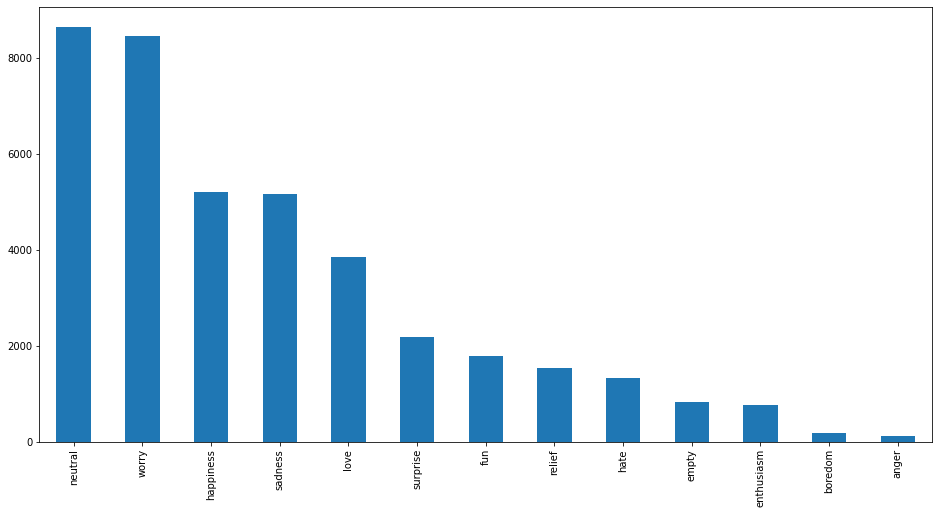

In [282]:
plt.figure(figsize=(16,8))
df['emotions'].value_counts().plot(kind='bar')

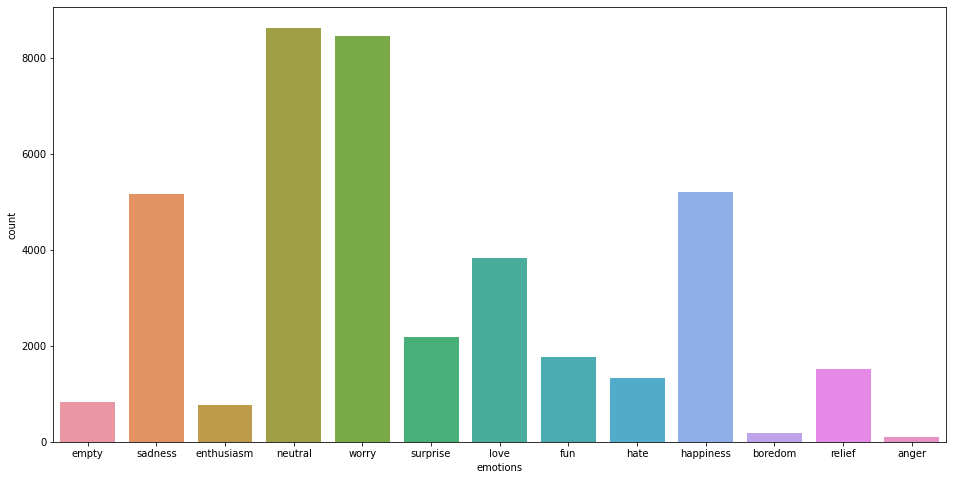

In [283]:
plt.figure(figsize=(16,8))
sns.countplot(x='emotions',data=df)

In [121]:
from textblob import TextBlob

In [122]:
from textblob import TextBlob

def get_sentiment(text):
    def get_subjectivity(text):
        return TextBlob(text).sentiment.subjectivity
  
    def get_polarity(text):
        return TextBlob(text).sentiment.polarity
  
    text_blob = TextBlob(text)
    subjectivity = get_subjectivity(text)
    polarity = get_polarity(text)
    
    analysis = 'Neutral'
    if polarity < 0:
        analysis = 'Negative'
    elif polarity > 0:
        analysis = 'Positive'
    
    return analysis


In [123]:
result = get_sentiment('I hope to pass this course')
print(result)


Neutral


In [124]:
df['sentiments'] = df['content'].apply(get_sentiment)

In [125]:
df.head()

,tweet_id,emotions,content,sentiments
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,Negative
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,Neutral
2,1956967696,sadness,Funeral ceremony...gloomy friday...,Neutral
3,1956967789,enthusiasm,wants to hang out with friends SOON!,Positive
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,Neutral


In [126]:
df.groupby([df['emotions'].apply(lambda x: str(x)), df['sentiments'].apply(lambda x: str(x))]).size()

emotions    sentiments
anger       Negative        34
            Neutral         41
            Positive        35
boredom     Negative        80
            Neutral         56
            Positive        43
empty       Negative       168
            Neutral        418
            Positive       241
enthusiasm  Negative       100
            Neutral        254
            Positive       405
fun         Negative       205
            Neutral        474
            Positive      1097
happiness   Negative       345
            Neutral       1224
            Positive      3640
hate        Negative       694
            Neutral        364
            Positive       265
love        Negative       214
            Neutral        684
            Positive      2944
neutral     Negative      1156
            Neutral       4442
            Positive      3040
relief      Negative       207
            Neutral        477
            Positive       842
sadness     Negative      1886
            Neut

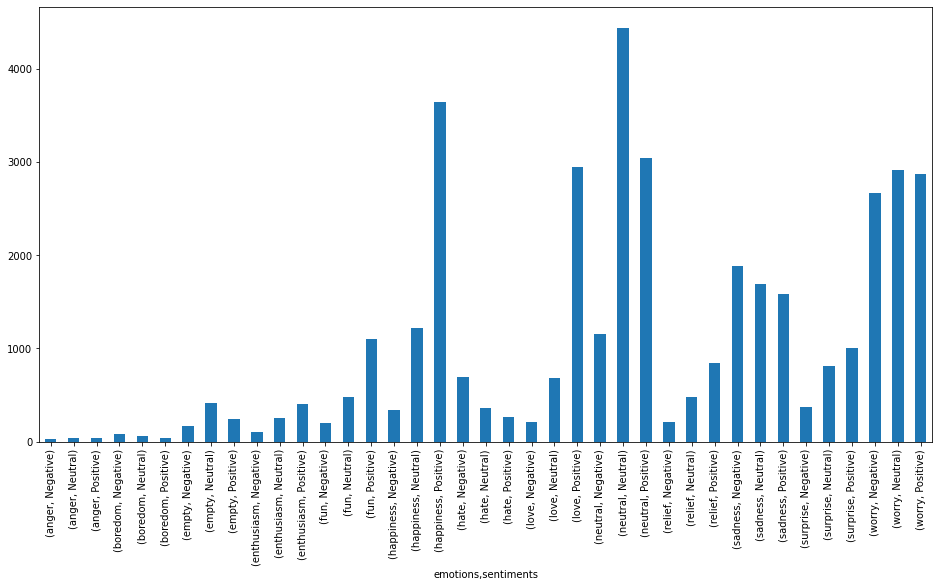

In [286]:
plt.figure(figsize=(16,8))
df.groupby(['emotions', 'sentiments']).size().plot(kind='bar')

In [129]:
sns.factorplot
sns.catplot

<function seaborn.categorical.catplot(*, x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x7f149411e790>, ci=95, n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)>

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


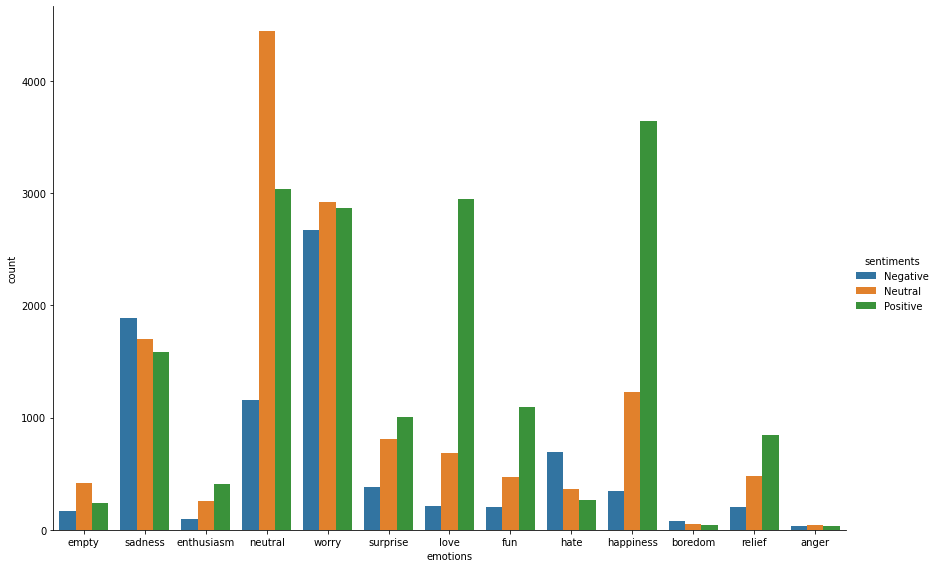

In [267]:
sns.factorplot(x='emotions', hue='sentiments', data=df, kind='count', size=8, aspect=1.5)

In [298]:
df['clean_content'] = df['content'].apply(nfx.remove_stopwords)

In [299]:
#df['clean_content'] = df['clean_content'].apply(nfx.remove_stopwords)

In [300]:
df['clean_content'] = df['clean_content'].apply(nfx.remove_userhandles)

In [301]:
df['clean_content'] = df['clean_content'].apply(nfx.remove_punctuations)

In [302]:
df[['content','clean_content']]

,content,clean_content
0,know listenin bad habit earlier started freaki...,know listenin bad habit earlier started freaki...
1,Layin n bed headache ughhhh...waitin call...,Layin n bed headache ughhhhwaitin call
2,Funeral ceremony...gloomy friday...,Funeral ceremonygloomy friday
3,wants hang friends SOON!,wants hang friends SOON
4,"want trade Houston tickets, will.",want trade Houston tickets will
...,...,...
39995,,
39996,Happy Mothers Day love,Happy Mothers Day love
39997,"Happy Mother's Day mommies there, woman man lo...",Happy Mothers Day mommies there woman man long...
39998,WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP NEW HIT S...,WASSUP BEAUTIFUL FOLLOW ME PEEP NEW HIT SINGLE...


Preprocessing

In [142]:
from collections import Counter

In [175]:
def extract_keywords(text, num=50):
  tokens = [tok for tok in text.split()]
  most_common_tokens = Counter(tokens).most_common(num)
  return dict(most_common_tokens)

In [176]:
emotion_list = df['emotions'].unique().tolist()

In [177]:
emotion_list

['empty',
 'sadness',
 'enthusiasm',
 'neutral',
 'worry',
 'surprise',
 'love',
 'fun',
 'hate',
 'happiness',
 'boredom',
 'relief',
 'anger']

In [178]:
anger_list = df[df['emotions'] == 'anger']['content'].tolist()

In [179]:
anger_docx = ' '.join(anger_list)

In [180]:
anger_docx

'fuckinm transtelecom Working Fridaaaayyyyy Packing like it tried dye hair got blond chunk middle hair Dang quotlocked abroadquot makes bein half brown good risk mgmt travelin 3rd world blend feel sorry hostage magnet white pepo damned hordies yes boo soar throats earaches stomach EXPLODE wendys tastes good bad you Hey Wahts happening #coffeclub didnt coffee days historical Jesus exist Im finding hard prove hearsay accounts  bugs  lost files high school hav chance win $10 $100 $1000 given free $ planthave wait till plant grow know anythin knew dentention hard 2 want come come JEEEEEZ Demon Sam need numb pain xXx awh thats good better soon stuck stupid Jeuno flag up Wish Windy fishing ack read thats horrible accounting taste Oh let clarifyknow lots nice people live there thought breeding ground 4 BNP Confuzzled toaster oven fault Im going look like idiot father smh whin comment u serious touched arse ohmygod u bitch lol aaaaawwwwwww u tell that Link ff quothow worksquot broke aaaaaaaaaa

In [181]:
keyword_anger = extract_keywords(anger_docx)

In [182]:
keyword_anger

{'Im': 8,
 'like': 5,
 'got': 5,
 'good': 5,
 'know': 5,
 'going': 5,
 'work': 5,
 'day': 5,
 'haha': 5,
 'feel': 4,
 'need': 4,
 'thats': 4,
 'u': 4,
 'im': 4,
 'right': 4,
 'it': 3,
 'hair': 3,
 'bad': 3,
 'you': 3,
 'hard': 3,
 '2': 3,
 'want': 3,
 'soon': 3,
 'people': 3,
 'lol': 3,
 'bout': 3,
 'left': 3,
 'think': 3,
 'me': 3,
 'ass': 3,
 'coffee': 2,
 'days': 2,
 'school': 2,
 'come': 2,
 'Wish': 2,
 'lots': 2,
 'live': 2,
 'fault': 2,
 'tell': 2,
 'time': 2,
 'Sorry': 2,
 'year': 2,
 'wanted': 2,
 'home': 2,
 'cant': 2,
 'yesterday': 2,
 'annoying': 2,
 'fucking': 2,
 'library': 2,
 'back': 2}

In [183]:
def plot_most_common_words(mydict, emotion_name):
  df1 = pd.DataFrame(mydict.items(), columns = ['token', 'count'])
  plt.figure(figsize = (20,10))
  sns.barplot(x='token', y='count', data=df1)
  plt.xticks(rotation = 45)
  plt.show()

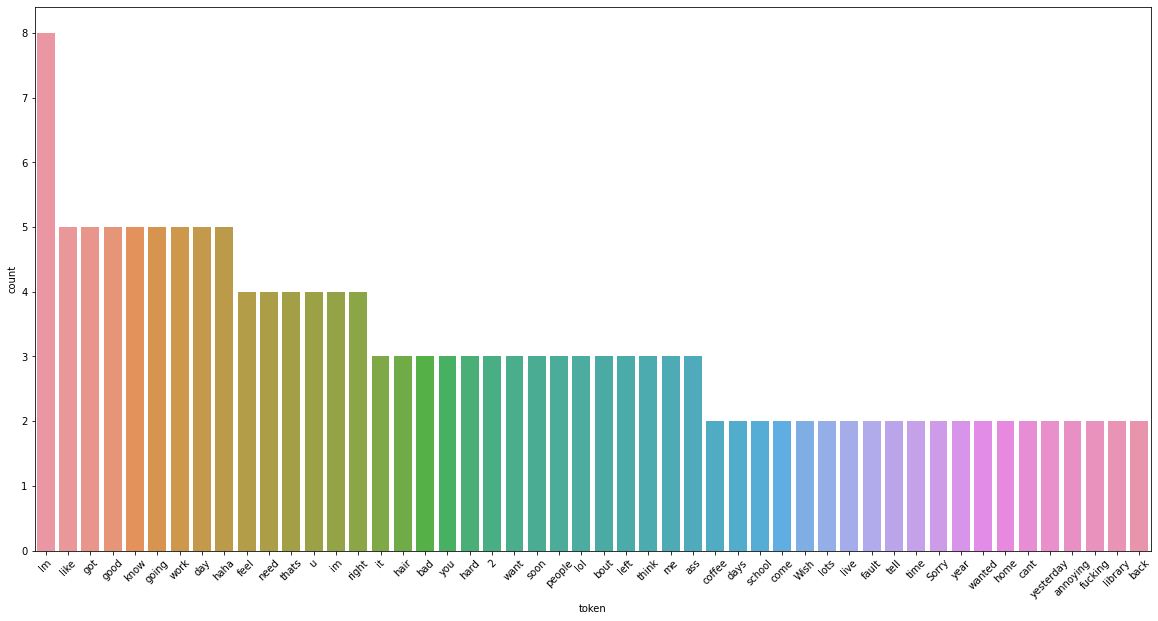

In [184]:
plot_most_common_words(keyword_anger, 'anger')

In [185]:
from wordcloud import WordCloud

In [188]:
def plot_wordcloud(docx):
  mywordcloud = WordCloud().generate(docx)
  plt.figure(figsize = (20,10))
  plt.imshow(mywordcloud, interpolation = 'bilinear')
  plt.axis('off')
  plt.show()

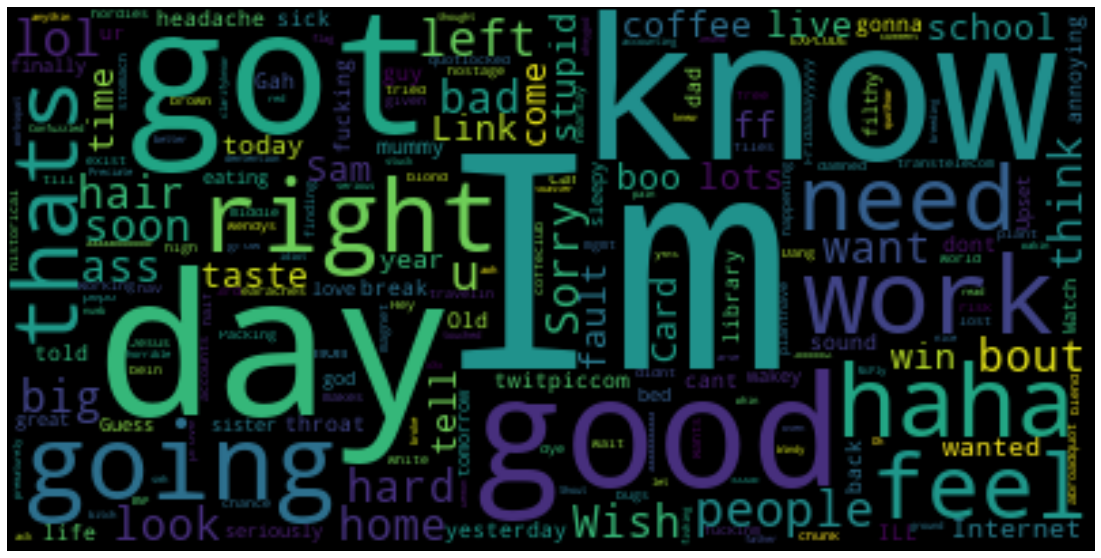

In [189]:
plot_wordcloud(anger_docx)

In [245]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [248]:
import nltk 

In [249]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [264]:
from nltk.corpus import stopwords

sw_list = stopwords.words("english")

df['content'] = df['content'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))

In [265]:
df

,tweet_id,emotions,content,sentiments
0,know listenin bad habit earlier started frea...,empty,know listenin bad habit earlier started freaki...,Negative
1,Layin n bed headache ughhhh...waitin call...,sadness,layin n bed headache ughhhhwaitin call,Neutral
2,Funeral ceremony...gloomy friday...,sadness,funeral ceremonygloomy friday,Neutral
3,wants hang friends SOON!,enthusiasm,wants hang friends soon,Positive
4,"want trade Houston tickets, will.",neutral,want trade houston tickets,Neutral
...,...,...,...,...
39995,,neutral,,Neutral
39996,Happy Mothers Day love,love,happy mothers day love,Positive
39997,"Happy Mother's Day mommies there, woman man lo...",love,happy mothers day mommies woman man long momma...,Positive
39998,WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP NEW HIT...,happiness,wassup beautiful follow peep new hit singles w...,Positive


In [259]:
import re
def remove_tags(raw_text):
    cleaned_text = re.sub(re.compile('<.*?>@'),"",raw_text)
    return cleaned_text

In [260]:
df["content"] = df["content"].apply(remove_tags)

In [261]:
df.head(5)

,tweet_id,emotions,content,sentiments
0,know listenin bad habit earlier started frea...,empty,know listenin bad habit earlier started freaki...,Negative
1,Layin n bed headache ughhhh...waitin call...,sadness,Layin n bed headache ughhhhwaitin call,Neutral
2,Funeral ceremony...gloomy friday...,sadness,Funeral ceremonygloomy friday,Neutral
3,wants hang friends SOON!,enthusiasm,wants hang friends SOON,Positive
4,"want trade Houston tickets, will.",neutral,want trade Houston tickets will,Neutral


In [262]:
df["content"] = df["content"].apply(lambda x: x.lower())

In [263]:
df["content"][2]

'funeral ceremonygloomy friday'

Accuracy and prediction

In [240]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

from sklearn.model_selection import train_test_split

In [241]:
Xfeatures = df['content']
ylabels = df['emotions']

In [242]:
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [ ]:
cv.get_feature_names()

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size = 0.3, random_state =42)

In [201]:
nv_model = MultinomialNB()
nv_model.fit(X_train, y_train)

MultinomialNB()

In [202]:
nv_model.score(X_test, y_test)

0.31566666666666665

In [203]:
y_pred_for_nv = nv_model.predict(X_test)

In [204]:
y_pred_for_nv

array(['happiness', 'neutral', 'worry', ..., 'worry', 'neutral',
       'sadness'], dtype='<U10')

In [331]:
sample_text = ['I hope to passs this course']

In [206]:
vect = cv.transform(sample_text).toarray()

In [207]:
nv_model.predict_proba(vect)

array([[4.25140295e-07, 1.29799970e-06, 1.80543919e-05, 2.32634729e-04,
        2.41995704e-03, 8.07471350e-02, 1.07652884e-03, 3.28066873e-02,
        3.72693789e-01, 1.75532541e-03, 3.34890446e-02, 4.15655428e-03,
        4.70602566e-01]])

In [211]:
np.max(nv_model.predict_proba(vect))

0.4706025662929646

In [218]:
def predict_emotion(text, model):
  myvect = cv.transform(sample_text).toarray()
  prediction = model.predict(myvect)
  pred_proba = model.predict_proba(myvect)
  pred_percentage_for_all = dict(zip(model.classes_, pred_proba))
  print('Prediction:{}, Prediction Score:{}'.format(prediction[0], np.max(pred_proba)))
  return pred_percentage_for_all

In [332]:
predict_emotion(sample_text, nv_model)

Prediction:worry, Prediction Score:0.4706025662929646


{'anger': array([4.25140295e-07, 1.29799970e-06, 1.80543919e-05, 2.32634729e-04,
        2.41995704e-03, 8.07471350e-02, 1.07652884e-03, 3.28066873e-02,
        3.72693789e-01, 1.75532541e-03, 3.34890446e-02, 4.15655428e-03,
        4.70602566e-01])}

In [354]:
predict_emotion('I hope that my sister has not eaten my strawberries with choco', nv_model)

Prediction:worry, Prediction Score:0.4706025662929646


{'anger': array([4.25140295e-07, 1.29799970e-06, 1.80543919e-05, 2.32634729e-04,
        2.41995704e-03, 8.07471350e-02, 1.07652884e-03, 3.28066873e-02,
        3.72693789e-01, 1.75532541e-03, 3.34890446e-02, 4.15655428e-03,
        4.70602566e-01])}

Model classification

In [223]:
print(classification_report(y_test, y_pred_for_nv))

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        33
     boredom       0.00      0.00      0.00        57
       empty       0.25      0.00      0.01       242
  enthusiasm       0.00      0.00      0.00       249
         fun       0.08      0.00      0.00       513
   happiness       0.33      0.34      0.33      1568
        hate       0.33      0.01      0.02       383
        love       0.47      0.33      0.39      1134
     neutral       0.33      0.39      0.36      2620
      relief       0.00      0.00      0.00       515
     sadness       0.32      0.14      0.20      1560
    surprise       0.20      0.01      0.02       625
       worry       0.28      0.65      0.39      2501

    accuracy                           0.32     12000
   macro avg       0.20      0.14      0.13     12000
weighted avg       0.29      0.32      0.27     12000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [224]:
confusion_matrix(y_test, y_pred_for_nv)

array([[   0,    0,    0,    0,    0,    4,    0,    1,    7,    0,    5,
           0,   16],
       [   0,    0,    0,    0,    0,    2,    0,    2,   12,    0,    4,
           0,   37],
       [   0,    0,    1,    0,    0,   17,    0,    3,   92,    0,   11,
           0,  118],
       [   0,    0,    0,    0,    1,   41,    0,    4,   82,    0,   11,
           0,  110],
       [   0,    0,    0,    0,    1,  112,    1,   23,  142,    0,   20,
           1,  213],
       [   0,    0,    0,    0,    3,  527,    0,  151,  382,    1,   33,
           7,  464],
       [   0,    0,    0,    0,    0,   15,    3,    3,   76,    0,   50,
           3,  233],
       [   0,    0,    0,    0,    0,  246,    0,  376,  194,    0,   33,
           2,  283],
       [   0,    0,    1,    0,    6,  257,    2,   91, 1020,    1,  105,
           5, 1132],
       [   0,    0,    0,    0,    1,   88,    0,   30,  135,    0,   24,
           0,  237],
       [   0,    0,    1,    0,    0,   70,    0, 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 2160x720 with 0 Axes>

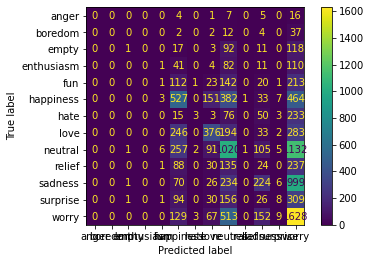

In [346]:
plt.figure(figsize=(30,10))
plot_confusion_matrix(nv_model, X_test, y_test)

In [334]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [317]:
lr_model.score(X_test, y_test)

0.33425

In [323]:
sample_text = ['I want strawberries with choco']

In [330]:
predict_emotion(sample_text, lr_model)

Prediction:neutral, Prediction Score:0.7177560788908315


{'anger': array([0.0016822 , 0.00308964, 0.02047043, 0.02707949, 0.00726169,
        0.07316808, 0.01660696, 0.04038238, 0.71775608, 0.01239721,
        0.02718211, 0.01843932, 0.03448439])}